# Sphere and Cone

In [1]:
# Load other libraries
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Constants
r_moon = 1737.4e3
x0, y0, z0 = [2e6, 0, 0]

In [15]:
# Cone Rotation from z to origin
vector = np.array([0, 0 , 1])
target = np.array([x0, y0, z0]/np.linalg.norm([x0, y0, z0]))

axis = np.cross(vector, target)
angle = np.arccos(np.dot(vector, target))

# Apply Rodrigues' formula to rotate the vector
R = np.array([[np.cos(angle) + axis[0]**2*(1-np.cos(angle)), axis[0]*axis[1]*(1-np.cos(angle)) - axis[2]*np.sin(angle), axis[0]*axis[2]*(1-np.cos(angle)) + axis[1]*np.sin(angle)],
              [axis[1]*axis[0]*(1-np.cos(angle)) + axis[2]*np.sin(angle), np.cos(angle) + axis[1]**2*(1-np.cos(angle)), axis[1]*axis[2]*(1-np.cos(angle)) - axis[0]*np.sin(angle)],
              [axis[2]*axis[0]*(1-np.cos(angle)) - axis[1]*np.sin(angle), axis[2]*axis[1]*(1-np.cos(angle)) + axis[0]*np.sin(angle), np.cos(angle) + axis[2]**2*(1-np.cos(angle))]])

### Meshes

In [16]:
# Sphere
# Angles
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

# Create a meshgrid of phi and theta values
phi, theta = np.meshgrid(phi, theta)

# Calculate the x, y, and z coordinates for each point on the sphere
xM = r_moon * np.sin(theta) * np.cos(phi)
yM = r_moon * np.sin(theta) * np.sin(phi)
zM = r_moon * np.cos(theta)

In [17]:
# Create cone
angle = np.pi/3  # angle of the cone
h = np.sqrt(x0**2+y0**2+z0**2)-0.7*r_moon  # height of the cone
r_cone = h/np.tan(angle)  # radius of the base of the cone

# Angles
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, h, 100)

# Mesh
x_cone = r_cone*(v/h)*np.outer(np.cos(u), np.ones(np.size(v)))
y_cone = r_cone*(v/h)*np.outer(np.sin(u), np.ones(np.size(v)))
z_cone = np.outer(np.ones(np.size(u)), v)

# Apply rotation matrix
cone_coords = np.stack([x_cone, y_cone, z_cone], axis=-1)
rotated_coords = np.matmul(cone_coords, R)

x_cone_r = x0 + rotated_coords[..., 0]
y_cone_r = y0 + rotated_coords[..., 1]
z_cone_r = z0 + rotated_coords[..., 2]

In [20]:
%matplotlib qt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xM, yM, zM, color='b', alpha=0.2)
ax.plot_surface(x_cone_r, y_cone_r, z_cone_r, color='r', alpha=0.7)
ax.set_xlabel('x [$10^6$ m]')
ax.set_ylabel('y [$10^6$ m]')
ax.set_zlabel('z [$10^6$ m]')
plt.show()

### Scatter Points

In [21]:
# Create Sphere
# Generate the spherical coordinates
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

# Convert the spherical coordinates to Cartesian coordinates
sphere_points = []
for i in phi:
    for j in theta:
        x = r_moon * np.sin(j) * np.cos(i)
        y = r_moon * np.sin(j) * np.sin(i)
        z = r_moon * np.cos(j)
        sphere_points.append([x, y, z])

# Plot the points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*sphere_points), s=1, color='grey')
ax.set_xlabel('x [$10^6$ m]')
ax.set_ylabel('y [$10^6$ m]')
ax.set_zlabel('z [$10^6$ m]')
plt.show()


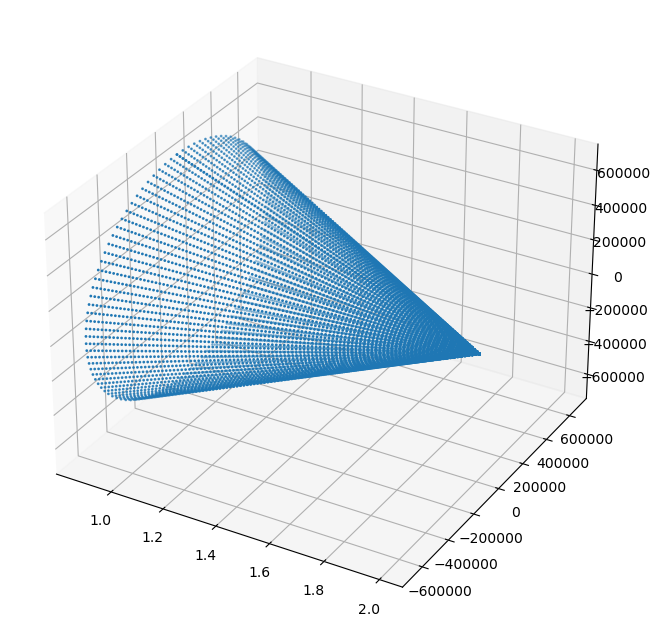

In [9]:
# Create Cone
angle = np.pi/3  # angle of the cone
h = np.sqrt(x0**2+y0**2+z0**2)-0.5*r_moon  # height of the cone
r_cone = h/np.tan(angle)  # radius of the base of the cone

u_t = np.linspace(0, 2*np.pi, 100)
v_t = np.linspace(0, h, 100)

cone_points = []
for u in u_t:
    for v in v_t:
        x_cone = r_cone*(v/h)*np.cos(u)
        y_cone = r_cone*(v/h)*np.sin(u)
        z_cone = v
        cone_points.append([x_cone, y_cone, z_cone])

# Apply rotation matrix
cone_points = np.matmul(cone_points, R)

# Translate
cone_points = cone_points + np.array([x0, y0, z0])

# Plot the points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*cone_points), s=1)
plt.show()

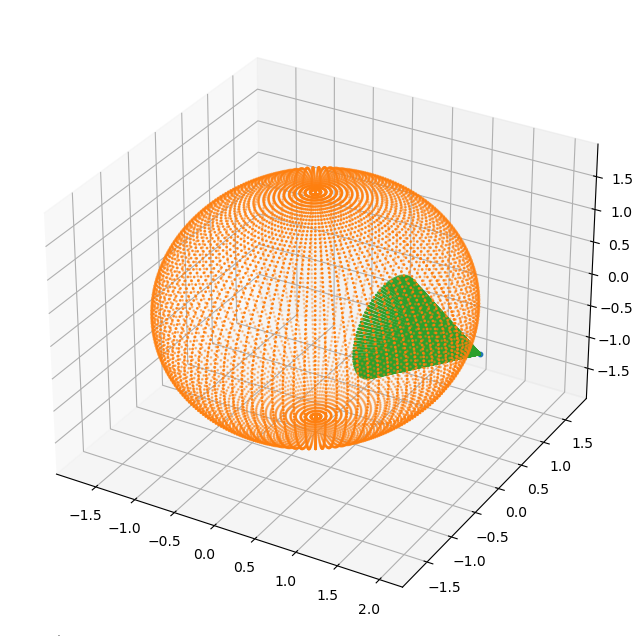

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0,y0,z0, s=10)
ax.scatter(*zip(*sphere_points), s=1)
ax.scatter(*zip(*cone_points), s=1)
plt.show()

In [ ]:
# Find intersection points
intersection_points = []
for point in cone_points:
    x, y, z = point[0], point[1], point[2]
    if ((x**2+y**2+z**2) <= r_moon**2) and ((x**2+y**2+z**2) >= (0.995*r_moon)**2):
        intersection_points.append([x, y, z])

# Plot the points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*intersection_points), s=1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(*zip(*sphere_points), s=1)
ax.plot_surface(xM, yM, zM, color='b', alpha=0.2)

ax.scatter(*zip(*intersection_points), s=10)

#ax.scatter(*zip(*cone_points), s=1)
plt.show()

### No Cone

In [4]:
# Constants
r_moon = 1.737e6  # m
pos = [[2e6, 0, 0],
       [2e6*np.sin(np.pi/6), 2e6*np.cos(np.pi/6), 0],
       [0,2e6,0], 
       [2e6*np.sin(np.pi/6)*np.sin(4.9*np.pi/7), 2e6*np.cos(np.pi/6)*np.sin(4.9*np.pi/7), 2e6*np.cos(4.9*np.pi/7)],
       ]

In [5]:
# Create Sphere
# Generate the spherical coordinates
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

# Convert the spherical coordinates to Cartesian coordinates
sphere_points = []
for i in phi:
    for j in theta:
        x = r_moon * np.sin(j) * np.cos(i)
        y = r_moon * np.sin(j) * np.sin(i)
        z = r_moon * np.cos(j)
        sphere_points.append([x, y, z])

In [10]:
# Define satellite cone
alpha = np.pi*100/180  # angle of the cone

def h(x_r, y_r, z_r, alpha, connected_points):
    a = np.sqrt(x_r**2+y_r**2+z_r**2)  # height of the cone
    h_max = 0.5*(2*r_moon*np.cos(alpha) + np.sqrt(2)*np.sqrt(2*a**2-r_moon**2+r_moon**2*np.cos(2*alpha)))
    if h_max>np.sqrt(a**2+r_moon**2):
        h_max = np.sqrt(a**2+r_moon**2)
    for i, point in enumerate(sphere_points):
        x, y, z = point[0], point[1], point[2]
        if np.sqrt((x-x_r)**2+(y-y_r)**2+(z-z_r)**2) <= h_max:
            connected_points[i] += 1
    return h_max, connected_points

cpoints = np.zeros(len(sphere_points))
for i in range(len(pos)):
    h_max, cpoints = h(*pos[i], alpha, cpoints)
sphere_points = np.array(sphere_points)


In [11]:
%matplotlib qt
# Plot the points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(*zip(*sphere_points), s=1)
ax.plot_surface(xM, yM, zM, color='grey', alpha=0.2)
ax.scatter(*zip(*pos), s=10)
if 1 in cpoints:
    ax.scatter(*zip(*sphere_points[np.where(cpoints == 1)]), s=5, c='r')
if 2 in cpoints:
    ax.scatter(*zip(*sphere_points[np.where(cpoints == 2)]), s=5, c='y')
if 3 in cpoints:
    ax.scatter(*zip(*sphere_points[np.where(cpoints == 3)]), s=5, c='g')
ax.set_aspect('equal')
plt.show()